In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import os

import ar_analysis as ara
import processing as arp

In [2]:
data_ctrl = xr.open_mfdataset(
    '/archive/Marc.Prange/na_data/c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020/temporal_composite/'
    'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020_na_all_days_min_precip_20_1990-2020_temporal_composite_mean_Nov-Mar_lon_*.nc')
data_ctrl.load()
data_p2K = xr.open_mfdataset(
    '/archive/Marc.Prange/na_data/c192L33_am4p0_amip_HIRESMIP_nudge_wind_1day_p2K/temporal_composite/'
    'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1day_p2K_na_all_days_min_precip_20_1990-2020_temporal_composite_mean_Nov-Mar_lon_*.nc')
data_p2K.load()

/home/Marc.Prange/miniconda3/envs/AR_analysis/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:1093: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/home/Marc.Prange/miniconda3/envs/AR_analysis/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:1085: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/Marc.Prange/miniconda3/envs/AR_analysis/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:1093: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


<xarray.Dataset>
Dimensions:                    (lon: 145, lat: 100, time: 11, bnds: 2)
Coordinates:
  * bnds                       (bnds) float64 1.0 2.0
  * lat                        (lat) float64 20.25 20.75 21.25 ... 69.25 69.75
  * lon                        (lon) float64 -139.7 -139.1 ... -60.94 -60.31
  * time                       (time) timedelta64[ns] -5 days -4 days ... 5 days
Data variables: (12/22)
    average_DT                 (lon, lat, time) timedelta64[ns] 1 days ... 1 ...
    lat_bnds                   (lon, lat, time, bnds) float64 20.0 20.5 ... 70.0
    lon_bnds                   (lon, lat, time, bnds) float64 220.0 ... 300.0
    ts                         (lon, lat, time) float32 298.5 298.5 ... 276.3
    prw                        (lon, lat, time) float32 35.53 35.74 ... 3.85
    pr                         (lon, lat, time) float32 5.114e-05 ... 7.712e-06
    ...                         ...
    ar_shape                   (lon, lat, time) float64 1.0 1.0 1.0 ... 1.0 nan
    ar_pr                      (lon, lat, time) float32 3.805e-05 ... 0.0
    ar_prsn                    (lon, lat, time) float32 0.0 0.0 ... 0.0
    ar_prli                    (lon, lat, time) float32 3.805e-05 ... 0.0
    mrro_nfpr_frac             (lon, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    strong_precip_event_count  (lon, lat) int64 23 19 16 19 20 20 ... 2 0 0 1 1

## Event count

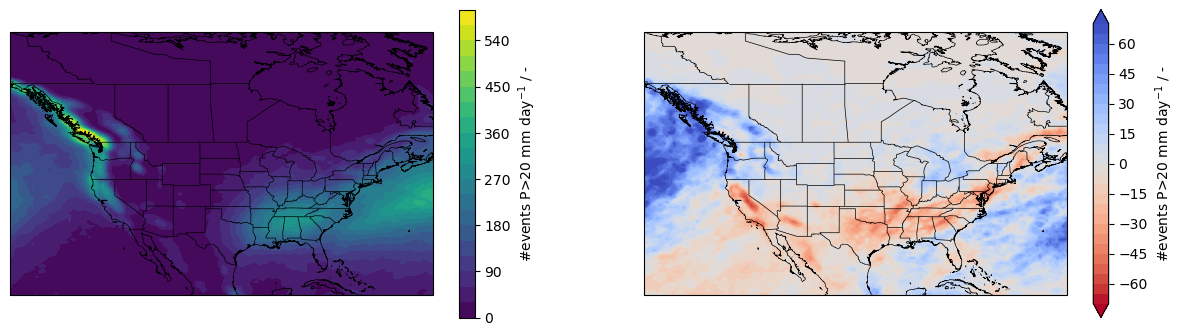

In [4]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
c1 = ax1.contourf(
    data_ctrl.lon, data_ctrl.lat, 
    data_ctrl.strong_precip_event_count.T, levels=20)
plt.colorbar(c1, label='#events P>20 mm day$^{-1}$ / -', shrink=0.8)
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
c2 = ax2.contourf(
    data_p2K.lon, data_p2K.lat, 
    (data_p2K.strong_precip_event_count.T - data_ctrl.strong_precip_event_count.T), 
    levels=np.arange(-70, 75, 5), cmap='coolwarm_r', extend='both')
plt.colorbar(c2, label='#events P>20 mm day$^{-1}$ / -', shrink=0.8)
for ax in [ax1, ax2]:
    # ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree())
    ax.coastlines("10m", linewidth=0.5)
    # axis.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='tab:blue', edgecolor='tab:blue', linewidth=0.5)
    # axis.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)
plt.savefig(
    'plots/p2K_analysis/na_20mm_pr_days_trend.png', 
    dpi=300, bbox_inches='tight')

## Precip changes for event days

### Mean

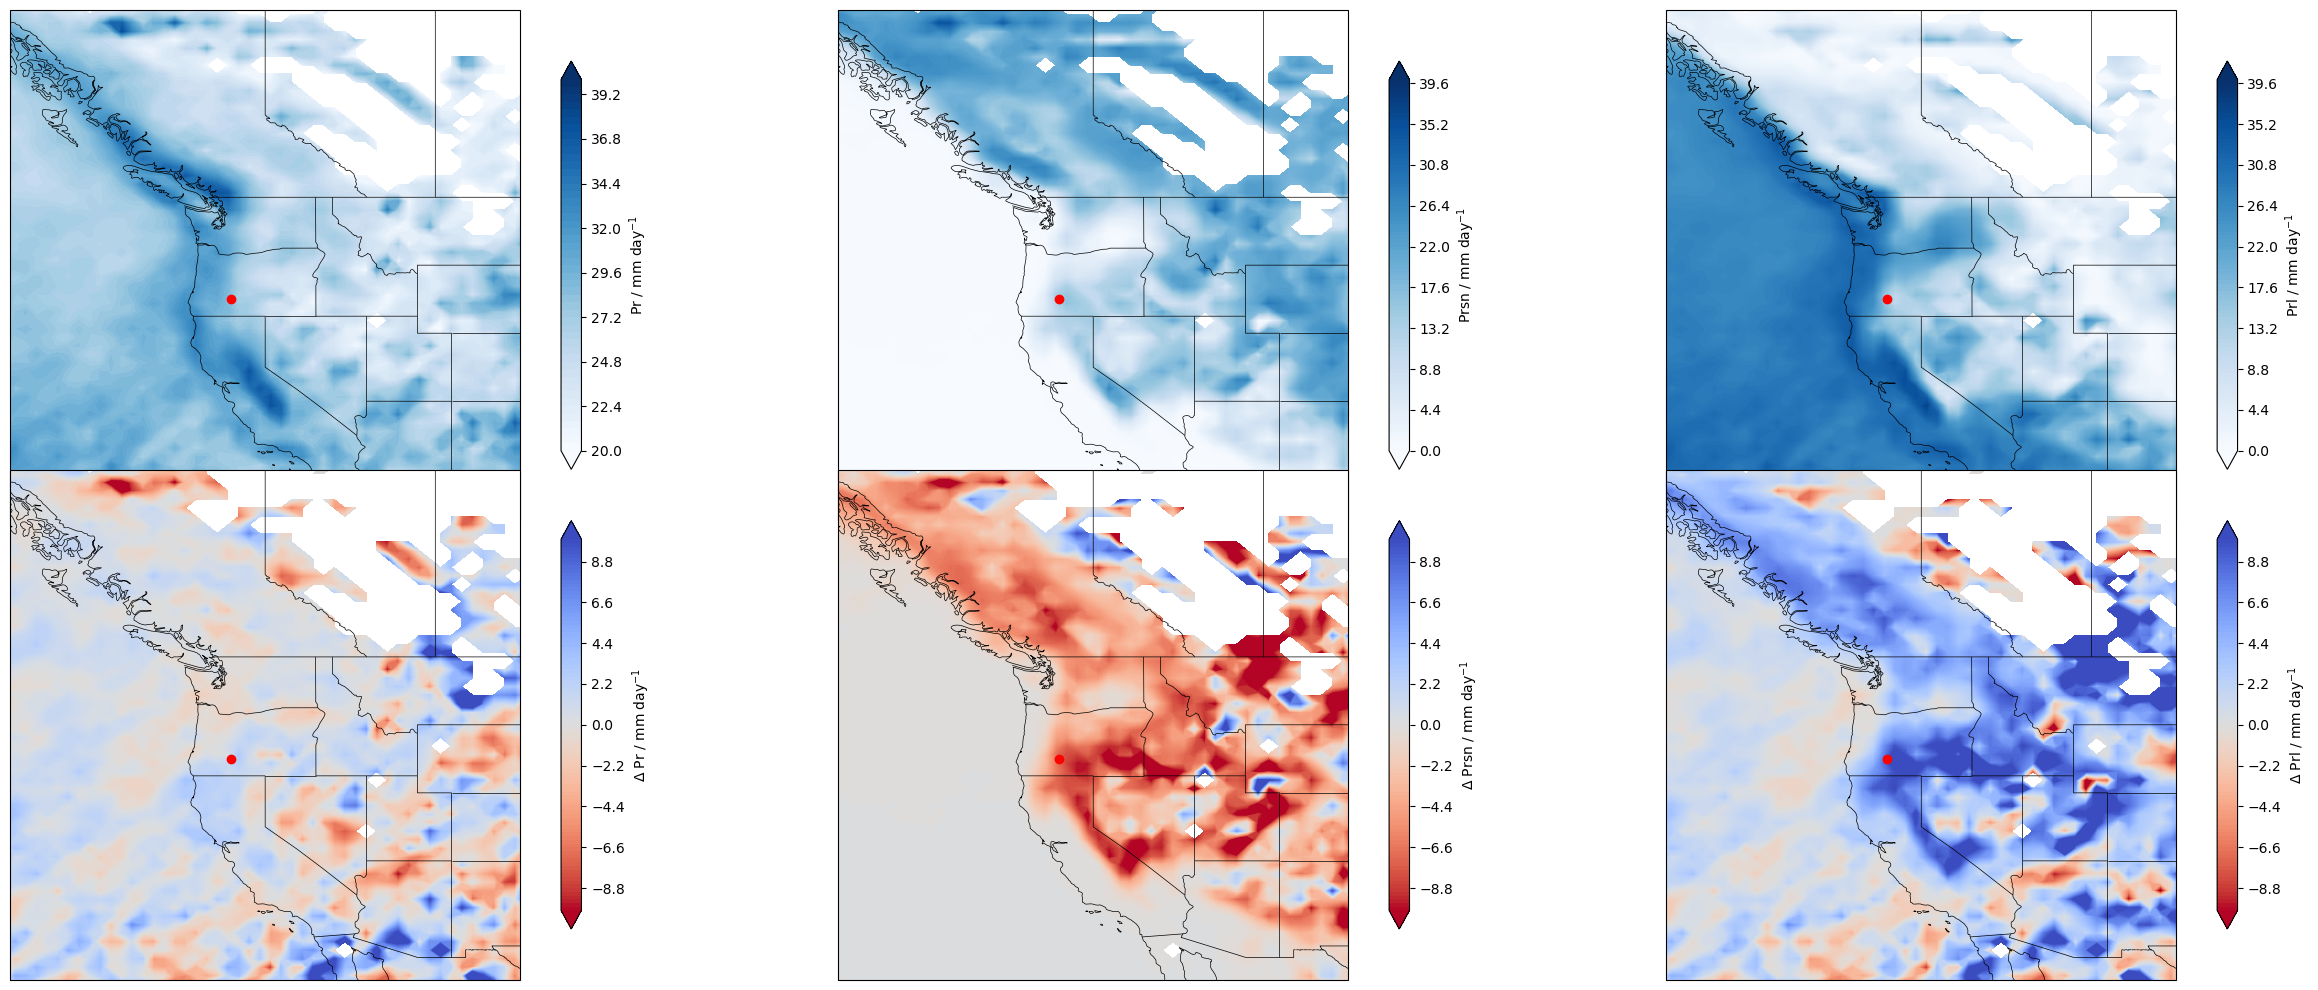

In [12]:
day = 5
data_ctrl_day = data_ctrl.isel(time=day)
data_p2K_day = data_p2K.isel(time=day)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(231, projection=ccrs.PlateCarree())
cf = ax1.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.pr.T*86400, 
    levels=np.arange(20, 40.4, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Pr / mm day$^{-1}$', shrink=0.8)

ax2 = fig.add_subplot(232, projection=ccrs.PlateCarree())
cf = ax2.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.prsn.T*86400, 
    levels=np.arange(0, 40.4, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Prsn / mm day$^{-1}$', shrink=0.8)

ax3 = fig.add_subplot(233, projection=ccrs.PlateCarree())
cf = ax3.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_ctrl_day.prli).T*86400, 
    levels=np.arange(0, 40.4, 0.4), cmap='Blues', extend='both')
plt.colorbar(cf, label='Prl / mm day$^{-1}$', shrink=0.8)

ax4 = fig.add_subplot(234, projection=ccrs.PlateCarree())
cf = ax4.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.pr - data_ctrl_day.pr).T*86400, 
    levels=np.arange(-10, 10.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Pr / mm day$^{-1}$', shrink=0.8)

ax5 = fig.add_subplot(235, projection=ccrs.PlateCarree())
cf = ax5.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.prsn - data_ctrl_day.prsn).T*86400, 
    levels=np.arange(-10, 10.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Prsn / mm day$^{-1}$', shrink=0.8)

ax6 = fig.add_subplot(236, projection=ccrs.PlateCarree())
cf = ax6.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.prli - data_ctrl_day.prli).T*86400, 
    levels=np.arange(-10, 10.2, 0.2), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ Prl / mm day$^{-1}$', shrink=0.8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6]
[ax.coastlines("50m", linewidth=0.5) for ax in axs]
[ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5) for ax in axs]
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
[ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5) for ax in axs]
plt.tight_layout()
[ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree()) for ax in axs]
[ax.scatter(-122, 43, color='red') for ax in axs]
plt.savefig(
    'plots/p2K_analysis/western_na_20mm_pr_days_mean_precip_trends.png', 
    dpi=300, bbox_inches='tight')

### Extreme (P95)

## Land hydrology changes for event days

### Mean

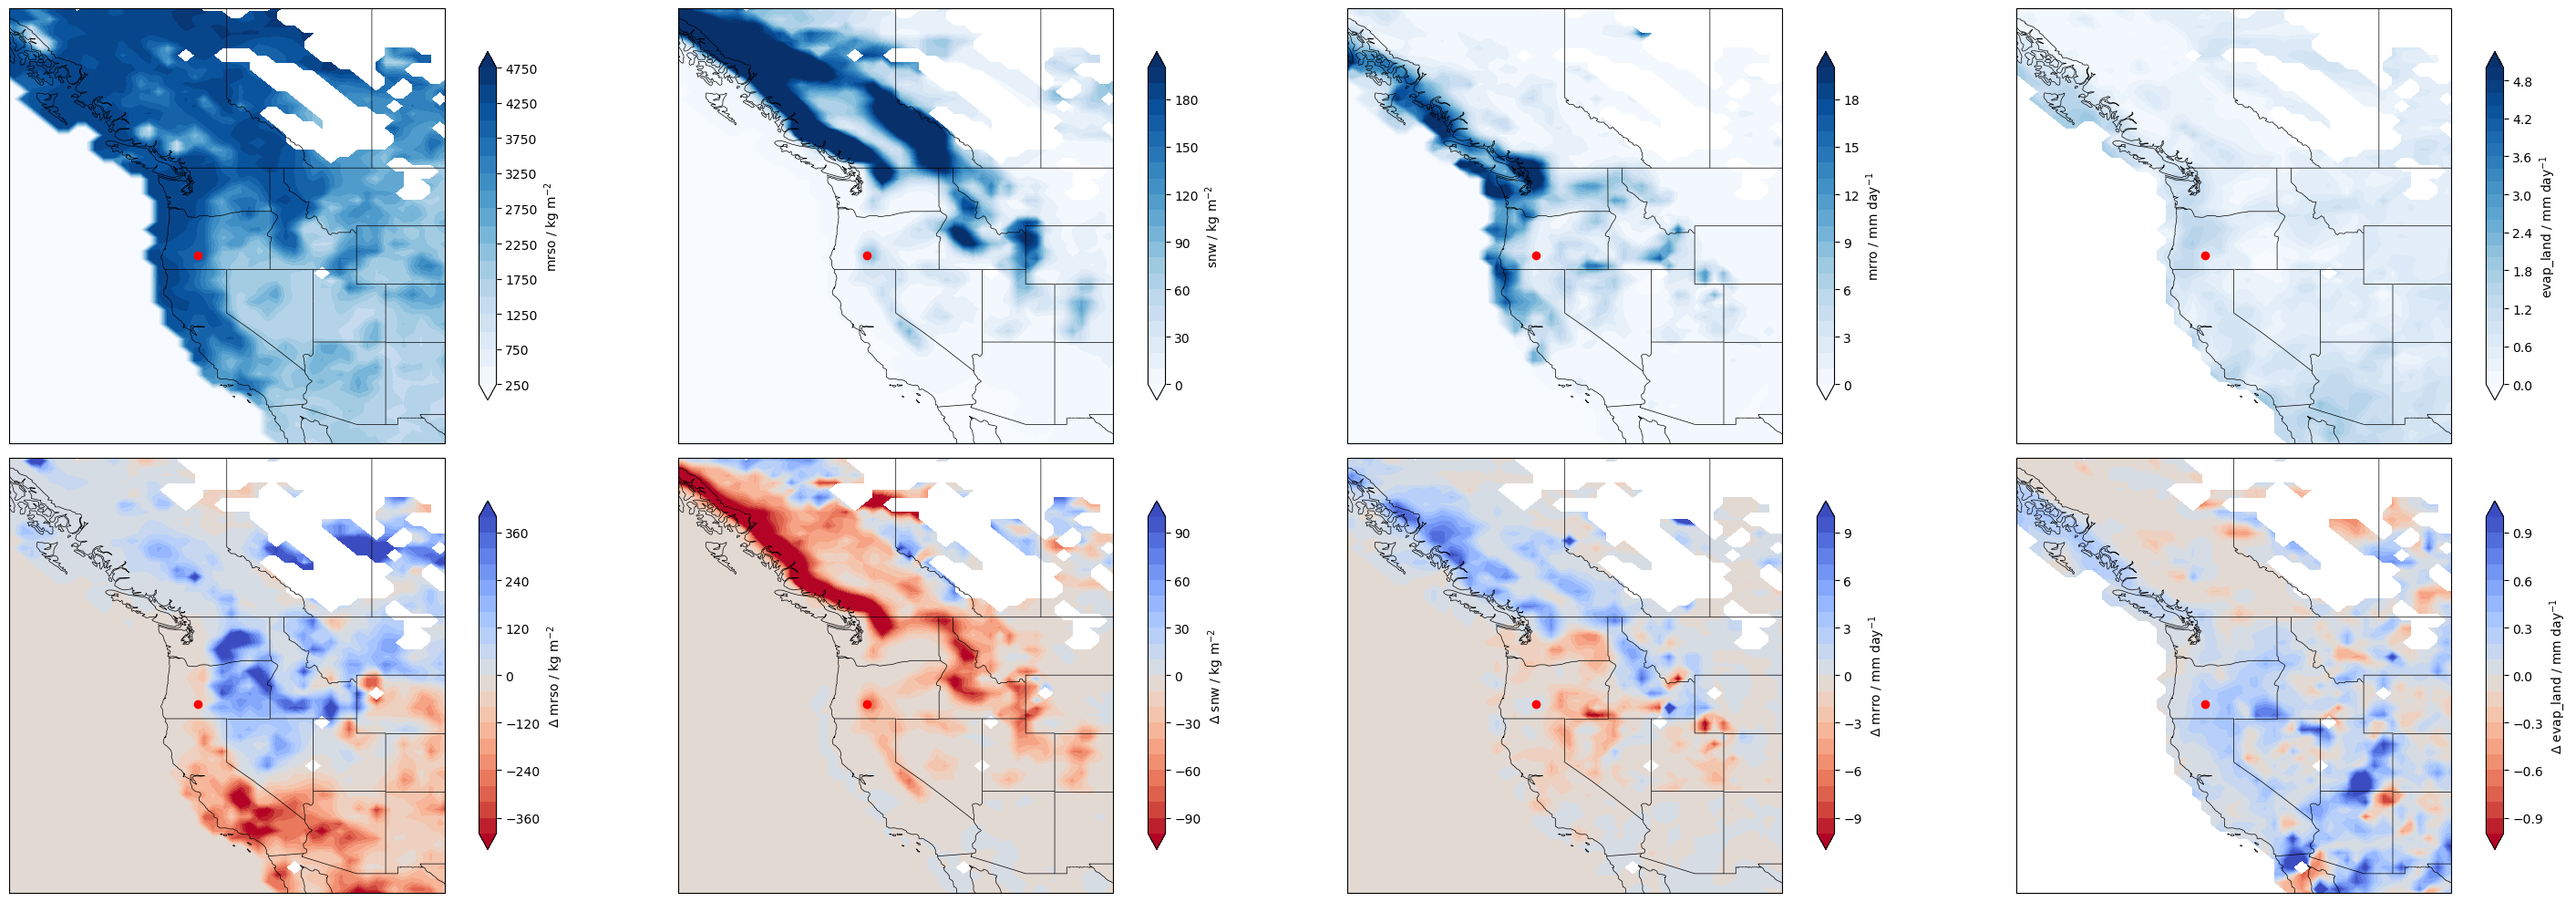

In [11]:
day = 5
data_ctrl_day = data_ctrl.isel(time=day)
data_p2K_day = data_p2K.isel(time=day)

fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(241, projection=ccrs.PlateCarree())
cf = ax1.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.mrso.T, 
    levels=20, cmap='Blues', extend='both')
plt.colorbar(cf, label='mrso / kg m$^{-2}$', shrink=0.8)

ax2 = fig.add_subplot(242, projection=ccrs.PlateCarree())
cf = ax2.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.snw.T, 
    levels=np.arange(0, 210, 10), cmap='Blues', extend='both')
plt.colorbar(cf, label='snw / kg m$^{-2}$', shrink=0.8)

ax3 = fig.add_subplot(243, projection=ccrs.PlateCarree())
cf = ax3.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.mrro.T*86400, 
    levels=np.arange(0, 21, 1), cmap='Blues', extend='both')
plt.colorbar(cf, label='mrro / mm day$^{-1}$', shrink=0.8)

ax4 = fig.add_subplot(244, projection=ccrs.PlateCarree())
cf = ax4.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.evap_land.T*86400, 
    levels=np.arange(0, 5.2, 0.2), cmap='Blues', extend='both')
plt.colorbar(cf, label='evap_land / mm day$^{-1}$', shrink=0.8)

ax5 = fig.add_subplot(245, projection=ccrs.PlateCarree())
cf = ax5.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.mrso - data_ctrl_day.mrso).T, 
    levels=np.arange(-400, 440, 40), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ mrso / kg m$^{-2}$', shrink=0.8)

ax6 = fig.add_subplot(246, projection=ccrs.PlateCarree())
cf = ax6.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.snw - data_ctrl_day.snw).T, 
    levels=np.arange(-100, 110, 10), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ snw / kg m$^{-2}$', shrink=0.8)

ax7 = fig.add_subplot(247, projection=ccrs.PlateCarree())
cf = ax7.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.mrro - data_ctrl_day.mrro).T*86400, 
    levels=np.arange(-10, 11, 1), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ mrro / mm day$^{-1}$', shrink=0.8)

ax8 = fig.add_subplot(248, projection=ccrs.PlateCarree())
cf = ax8.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.evap_land - data_ctrl_day.evap_land).T*86400, 
    levels=np.arange(-1, 1.1, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(cf, label='$\Delta$ evap_land / mm day$^{-1}$', shrink=0.8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
[ax.coastlines("50m", linewidth=0.5) for ax in axs]
[ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5) for ax in axs]
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
[ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5) for ax in axs]
[ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree()) for ax in axs]
[ax.scatter(-122, 43, color='red') for ax in axs]

plt.tight_layout()
# plt.savefig(
#     'plots/p2K_analysis/na_20mm_pr_days_mean_land_hydrology_trends.png', 
#     dpi=300, bbox_inches='tight')

In [33]:
data_ctrl_day

<xarray.Dataset>
Dimensions:                    (lon: 145, lat: 100, bnds: 2)
Coordinates:
  * bnds                       (bnds) float64 1.0 2.0
  * lat                        (lat) float64 20.25 20.75 21.25 ... 69.25 69.75
  * lon                        (lon) float64 -139.7 -139.1 ... -60.94 -60.31
    time                       timedelta64[ns] 00:00:00
Data variables: (12/22)
    average_DT                 (lon, lat) timedelta64[ns] 1 days 1 days ... NaT
    lat_bnds                   (lon, lat, bnds) float64 20.0 20.5 ... nan nan
    lon_bnds                   (lon, lat, bnds) float64 220.0 220.6 ... nan nan
    ts                         (lon, lat) float32 296.3 296.2 296.0 ... nan nan
    prw                        (lon, lat) float32 41.64 41.62 42.12 ... nan nan
    pr                         (lon, lat) float32 0.0006382 0.0006387 ... nan
    ...                         ...
    ar_shape                   (lon, lat) float64 1.0 1.0 1.0 ... nan nan nan
    ar_pr                      (lon, lat) float32 0.0002937 0.0003041 ... nan
    ar_prsn                    (lon, lat) float32 0.0 0.0 0.0 ... nan nan nan
    ar_prli                    (lon, lat) float32 0.0002937 0.0003041 ... nan
    mrro_nfpr_frac             (lon, lat) float32 0.0 0.0 0.0 ... nan nan nan
    strong_precip_event_count  (lon, lat) int64 23 27 28 32 30 34 ... 0 0 0 0 0

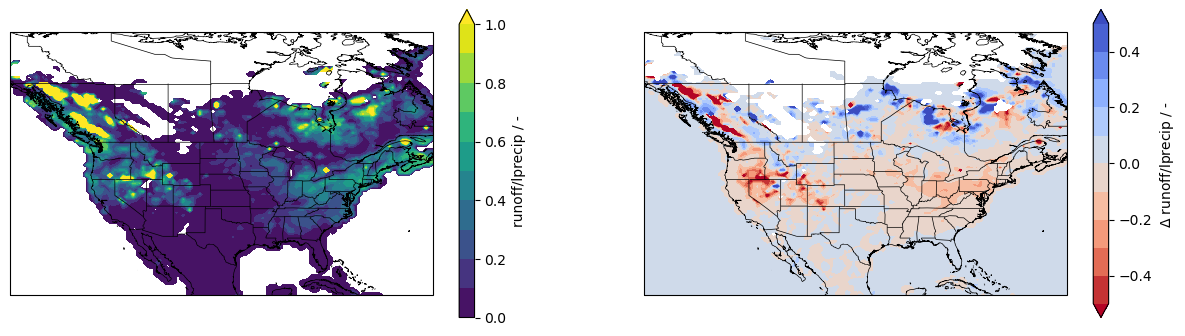

In [41]:
day = 5
data_ctrl_day = data_ctrl.isel(time=day)
data_p2K_day = data_p2K.isel(time=day)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
c1 = ax1.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    data_ctrl_day.mrro_nfpr_frac.T, levels=np.arange(0, 1.1, 0.1), extend='max')
plt.colorbar(c1, label='runoff/lprecip / -', shrink=0.8)
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
c2 = ax2.contourf(
    data_ctrl_day.lon, data_ctrl_day.lat, 
    (data_p2K_day.mrro_nfpr_frac - data_ctrl_day.mrro_nfpr_frac).T, 
    levels=np.arange(-0.5, 0.6, 0.1), cmap='coolwarm_r', extend='both')
plt.colorbar(c2, label='$\Delta$ runoff/lprecip / -', shrink=0.8)
for ax in [ax1, ax2]:
    # ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree())
    ax.coastlines("10m", linewidth=0.5)
    # axis.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='tab:blue', edgecolor='tab:blue', linewidth=0.5)
    # axis.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

## Relating liquid precipitation to soil moisture budget

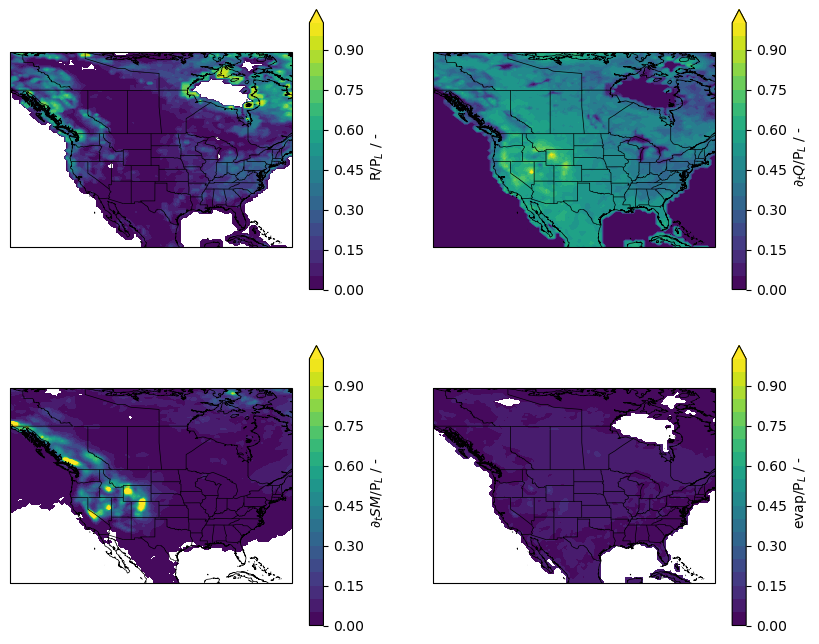

In [4]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
c1 = ax1.contourf(
    data.lon, data.lat, 
    data.mrro.isel(time=9).T / ((data.pr - data.prsn).isel(time=9).T), 
    levels=np.arange(0, 1.05, 0.05), extend='max')
plt.colorbar(c1, label='R/P$_{L}$ / -', shrink=1)

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
c2 = ax2.contourf(
    data.lon, data.lat, 
    data.mrso.differentiate('time', datetime_unit='D').isel(time=9).T / (((data.pr - data.prsn).isel(time=9).T)*86400), 
    levels=np.arange(0, 1.05, 0.05), extend='max')
plt.colorbar(c2, label='$\partial_{t}Q$/P$_{L}$ / -', shrink=1)

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
c3 = ax3.contourf(
    data.lon, data.lat, 
    -(data.snw.differentiate('time', datetime_unit='D') - data.prsn*86400).isel(time=9).T / ((data.pr - data.prsn).isel(time=9).T*86400), 
    levels=np.arange(0, 1.05, 0.05), extend='max')
plt.colorbar(c3, label='$\partial_{t}SM$/P$_{L}$ / -', shrink=1)

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
c4 = ax4.contourf(
    data.lon, data.lat, 
    (data.evap_land).isel(time=9).T*86400 / ((data.pr - data.prsn).isel(time=9).T*86400), 
    levels=np.arange(0, 1.05, 0.05), extend='max')
plt.colorbar(c4, label='evap/P$_{L}$ / -', shrink=1)

for ax in [ax1, ax2, ax3, ax4]:
    # ax.set_extent([-135, -105, 30, 60], crs=ccrs.PlateCarree())
    ax.coastlines("10m", linewidth=0.5)
    # axis.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='tab:blue', edgecolor='tab:blue', linewidth=0.5)
    # axis.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)
# plt.savefig(f'/home/Marc.Prange/work/AR-analysis/plots/runoff/west_NA_20mm_precip_events_mean_map_var_lprec_ratios_day0_1990_2020.png', dpi=300, bbox_inches='tight')